In [1]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
from dynamo.prepare_dataset import PrepareDataset

sys.path.append(os.path.abspath('../'))

In [2]:
wd = './data/'

In [3]:
# donorA
donorA_df = pd.read_csv(wd + 'data_original/raw_files/donorA_assigned_sample_names.csv', 
                        index_col = [0]).iloc[:-1].sort_index() #remove last row as is Nan
donorA_df.index = donorA_df.index.astype(int) 
donorA_df = donorA_df[~donorA_df.index.duplicated(keep=False)]
print(donorA_df.head())

          TACGTAGGGTGCGAGCGTTAATCGGAATTACTGGGCGTAAAGCGAGCGCAGACGGTTACTTAAGCAGGATGTGAAATCCCCGGGCTCAACCTGGGAACTG  \
timestep                                                                                                         
0                                                       0.0                                                      
1                                                       0.0                                                      
2                                                       0.0                                                      
3                                                       0.0                                                      
4                                                       0.0                                                      

          TACGTAGGTCCCGAGCGTTGTCCGGATTTATTGGGCGTAAAGCGAGCGCAGGCGGTTAGATAAGTCTGAAGTTAAAGGCTGTGGCTTAACCATAGTACGC  \
timestep                                                                               

## Interpolate data using PCHIP

In [14]:
path = wd + 'data_tests/first_interpolation_files/'

In [5]:
PrepareDataset.interpolate_pchip(donorA_df, path, 'donorA')

timestep,0,1,2,3,4,5,6,7,8,9,...,355,356,357,358,359,360,361,362,363,364
TACGTAGGGTGCGAGCGTTAATCGGAATTACTGGGCGTAAAGCGAGCGCAGACGGTTACTTAAGCAGGATGTGAAATCCCCGGGCTCAACCTGGGAACTG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TACGTAGGTCCCGAGCGTTGTCCGGATTTATTGGGCGTAAAGCGAGCGCAGGCGGTTAGATAAGTCTGAAGTTAAAGGCTGTGGCTTAACCATAGTACGC,4,7,0,0,1,0,1,0,0,0,...,0,0,0,4,4,5,2,0,0,0
TACGGAGGGTGCGAGCGTTAATCGGAATAACTGGGCGTAAAGGGCACGCAGGCGGTGACTTAAGTGAGGTGTGAAAGCCCCGGGCTTAACCTGGGAATTG,123,197,160,0,19,28,2139,1167,196,269,...,167,10,325,26,427,152,1502,1449,1082,86
TACGGAAGGTTCGGGCGTTATCCGGATTTATTGGGTTTAAAGGGAGCGTAGGCCGGAGATTAAGTGTGTTGTGAAATGTAGACGCTCAACGTCTGACTTG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TACGGAGGATGCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGTGCGTAGGCGGCCTGTTAAGTCAGCGGTGAAATCTAGGAGCTTAACTCCTAAATTG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TACGTAGGGGGCAAGCGTTATCCGGATTTACTGGGTGTAAGGGAGCGTAGACGGTGTGGCAAGTCTGATGTGAAGGGCATGGGCTCAACCTGTGGACTGC,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TACGAGGGCCTCGAGCGTTATCCGGAATTATTGGGCGTAAAGTGTGCGTAGGCGGCATTGTTAGTCGAGAGTTAAATCCTGGGGCTCAACCTCAGAATCG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TACGTATGGTGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAGCGTAGATGGGTTGTTAAGTCAGATGTGAAATCCCCGGGCTCAACCTGGGAACTG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TACGTATGGTGCAAGCGTTATCCGGATTTATTGGGTTTAAAGGGAGCGTAGATGGGTTGTTAAGTCAGATGTGAAATCCCCGGGCTCAACCTGGGAACTG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
donorA_pchip_interpolated = pd.read_csv(wd + 'data_original/first_interpolation_files/donorA_pchip_interpolated.tsv', sep='\t',  index_col = 0)
donorA_pchip_interpolated

,0,1,2,3,4,5,6,7,8,9,...,355,356,357,358,359,360,361,362,363,364
TACGTAGGGTGCGAGCGTTAATCGGAATTACTGGGCGTAAAGCGAGCGCAGACGGTTACTTAAGCAGGATGTGAAATCCCCGGGCTCAACCTGGGAACTG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TACGTAGGTCCCGAGCGTTGTCCGGATTTATTGGGCGTAAAGCGAGCGCAGGCGGTTAGATAAGTCTGAAGTTAAAGGCTGTGGCTTAACCATAGTACGC,4,7,0,0,1,0,1,0,0,0,...,0,0,0,4,4,5,2,0,0,0
TACGGAGGGTGCGAGCGTTAATCGGAATAACTGGGCGTAAAGGGCACGCAGGCGGTGACTTAAGTGAGGTGTGAAAGCCCCGGGCTTAACCTGGGAATTG,123,197,160,0,19,28,2139,1167,196,269,...,167,10,325,26,427,152,1502,1449,1082,86
TACGGAAGGTTCGGGCGTTATCCGGATTTATTGGGTTTAAAGGGAGCGTAGGCCGGAGATTAAGTGTGTTGTGAAATGTAGACGCTCAACGTCTGACTTG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TACGGAGGATGCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGTGCGTAGGCGGCCTGTTAAGTCAGCGGTGAAATCTAGGAGCTTAACTCCTAAATTG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TACGTAGGGGGCAAGCGTTATCCGGATTTACTGGGTGTAAGGGAGCGTAGACGGTGTGGCAAGTCTGATGTGAAGGGCATGGGCTCAACCTGTGGACTGC,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TACGAGGGCCTCGAGCGTTATCCGGAATTATTGGGCGTAAAGTGTGCGTAGGCGGCATTGTTAGTCGAGAGTTAAATCCTGGGGCTCAACCTCAGAATCG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TACGTATGGTGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAGCGTAGATGGGTTGTTAAGTCAGATGTGAAATCCCCGGGCTCAACCTGGGAACTG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TACGTATGGTGCAAGCGTTATCCGGATTTATTGGGTTTAAAGGGAGCGTAGATGGGTTGTTAAGTCAGATGTGAAATCCCCGGGCTCAACCTGGGAACTG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
max_depth = 18000
df =donorA_pchip_interpolated

rarefied_table, rarefaction_curves = PrepareDataset.rarefy_table(df, max_depth)


In [10]:
rarefied_table

,0,1,2,3,4,5,6,7,8,9,...,355,356,357,358,359,360,361,362,363,364
TACGTAGGGTGCGAGCGTTAATCGGAATTACTGGGCGTAAAGCGAGCGCAGACGGTTACTTAAGCAGGATGTGAAATCCCCGGGCTCAACCTGGGAACTG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TACGTAGGTCCCGAGCGTTGTCCGGATTTATTGGGCGTAAAGCGAGCGCAGGCGGTTAGATAAGTCTGAAGTTAAAGGCTGTGGCTTAACCATAGTACGC,4,7,0,0,1,0,1,0,0,0,...,0,0,0,4,4,5,2,0,0,0
TACGGAGGGTGCGAGCGTTAATCGGAATAACTGGGCGTAAAGGGCACGCAGGCGGTGACTTAAGTGAGGTGTGAAAGCCCCGGGCTTAACCTGGGAATTG,14,15,14,0,0,1,212,106,14,30,...,12,4,27,3,44,19,143,161,122,8
TACGGAAGGTTCGGGCGTTATCCGGATTTATTGGGTTTAAAGGGAGCGTAGGCCGGAGATTAAGTGTGTTGTGAAATGTAGACGCTCAACGTCTGACTTG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TACGGAGGATGCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGTGCGTAGGCGGCCTGTTAAGTCAGCGGTGAAATCTAGGAGCTTAACTCCTAAATTG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TACGTAGGGGGCAAGCGTTATCCGGATTTACTGGGTGTAAGGGAGCGTAGACGGTGTGGCAAGTCTGATGTGAAGGGCATGGGCTCAACCTGTGGACTGC,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TACGAGGGCCTCGAGCGTTATCCGGAATTATTGGGCGTAAAGTGTGCGTAGGCGGCATTGTTAGTCGAGAGTTAAATCCTGGGGCTCAACCTCAGAATCG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TACGTATGGTGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAGCGTAGATGGGTTGTTAAGTCAGATGTGAAATCCCCGGGCTCAACCTGGGAACTG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TACGTATGGTGCAAGCGTTATCCGGATTTATTGGGTTTAAAGGGAGCGTAGATGGGTTGTTAAGTCAGATGTGAAATCCCCGGGCTCAACCTGGGAACTG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
optimal_depth = PrepareDataset.find_optimal_depth(rarefaction_curves)
print(f'Optimal Depth: {optimal_depth}')


Optimal Depth: 1


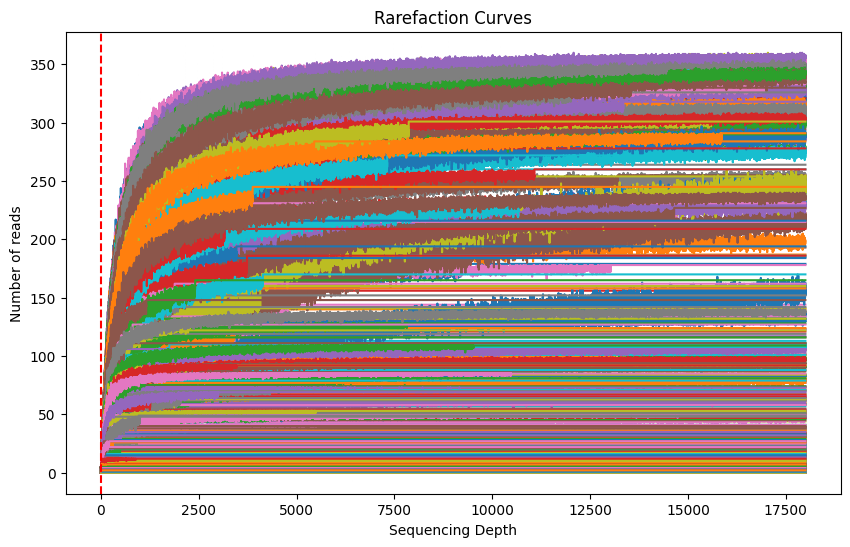

In [17]:
plt.figure(figsize=(10, 6))
for idx, curve in rarefaction_curves.items():
    plt.plot(range(1, max_depth + 1), curve, label=f'Sequence {idx}')
plt.axvline(x=optimal_depth, color='red', linestyle='--', label=f'Optimal Depth: {optimal_depth}')
plt.xlabel('Sequencing Depth')
plt.ylabel('Number of reads')
plt.title('Rarefaction Curves')
#plt.legend()
plt.show()

## Interpolate after rarefaction

In [36]:
path = wd + 'data_tests/ready_files/'

In [42]:
rarefied_table_df = rarefied_table.T
rarefied_table_df.index = rarefied_table_df.index.astype(int)
rarefied_table_df

,TACGTAGGGTGCGAGCGTTAATCGGAATTACTGGGCGTAAAGCGAGCGCAGACGGTTACTTAAGCAGGATGTGAAATCCCCGGGCTCAACCTGGGAACTG,TACGTAGGTCCCGAGCGTTGTCCGGATTTATTGGGCGTAAAGCGAGCGCAGGCGGTTAGATAAGTCTGAAGTTAAAGGCTGTGGCTTAACCATAGTACGC,TACGGAGGGTGCGAGCGTTAATCGGAATAACTGGGCGTAAAGGGCACGCAGGCGGTGACTTAAGTGAGGTGTGAAAGCCCCGGGCTTAACCTGGGAATTG,TACGGAAGGTTCGGGCGTTATCCGGATTTATTGGGTTTAAAGGGAGCGTAGGCCGGAGATTAAGTGTGTTGTGAAATGTAGACGCTCAACGTCTGACTTG,TACGGAGGATGCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGTGCGTAGGCGGCCTGTTAAGTCAGCGGTGAAATCTAGGAGCTTAACTCCTAAATTG,TACGTAGGTGGCAAGCGTTGTCCGGAATTATTGGGCGTAAAGCGCGCGCAGGCGGATTGGTCAGTCTGTCTTAAAAGTTCGGGGCTTAACCCCGTGATGG,TACGTAGGTCCCGAGCGTTGTCCGGATTTATTGGGCGTAAAGCGAGCGCAGGCGGTTTGATAAGTCTGAAGTTAAAGGCTGTGGCTCAACCATAGTTCGC,TACGGAAGGTCCAGGCGTTATCCGGATTTATTGGGTTTAAAGGGAGCGTAGGCTGGAGATTAAGTGTGTTGTGAAATGTAGACGCTCAACGTCTGAATTG,TACGTATGTCACAAGCGTTATCCGGATTTATTGGGCGTAAAGCGCGTCTAGGTGGTTATGTAAGTCTGATGTGAAAATGCAGGGCTCAACTCTGTATTGC,TACGTAGGTGGCAAGCGTTGTCCGGAATTATTGGGCGTAAAGCGCGCGCAGGTGGTTTAATAAGTCTGATGTGAAAGCCCACGGCTCAACCGTGGAGGGG,...,TACGTAGGTGGCGAGCGTTATCCGGATTTACTGGGTGTAAAGGGCGCGTAGGCGGGAATGCAAGTCAGATGTGAAATCCAGGGGCTTAACCCTTGGACTG,TACGTAGGTGGCAAGCGTTATCCGGATTTATTGGGTTTAAAGGGTGCGTAGGCGGCTTGATAAGTCAGTGGTTAAAGGTAGCAGCTTAAATGTTTTACAT,TACGTAGGGCGCAAGCGTTATCCGGAATTATTGGGCGTAAAGAGCTCGTAGGCGGTTTGTCGCGTCTGCTGTGAAAGACCTGGGCTCAACTCCGGGTCTG,TACGTAGGGGGCAAGCGTTATCCGGATTTACTGGGTGTAAGGGGAGCGTAGACGGTAAAGCAAGTCTGAAGCGAAAGCCCGCGGCTCAACTGCGGGACTG,TACGTAGGGTGCAAGCGTTATCCGGAATTATTGGGCGTAAAGAGCTCGTAGGCGGTTTGTCGCGTCTGCTGTGAAAACCCGAGGCTCCACCTCGGGCCTG,TACGTAGGGGGCAAGCGTTATCCGGATTTACTGGGTGTAAGGGAGCGTAGACGGTGTGGCAAGTCTGATGTGAAGGGCATGGGCTCAACCTGTGGACTGC,TACGAGGGCCTCGAGCGTTATCCGGAATTATTGGGCGTAAAGTGTGCGTAGGCGGCATTGTTAGTCGAGAGTTAAATCCTGGGGCTCAACCTCAGAATCG,TACGTATGGTGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAGCGTAGATGGGTTGTTAAGTCAGATGTGAAATCCCCGGGCTCAACCTGGGAACTG,TACGTATGGTGCAAGCGTTATCCGGATTTATTGGGTTTAAAGGGAGCGTAGATGGGTTGTTAAGTCAGATGTGAAATCCCCGGGCTCAACCTGGGAACTG,TACGTAGGTGGCGAGCGTTGTCCGGATTTACTGGGCGTAAAGGGAGCGTAGGCGGATTTTTAAGTGAGATGTGAAATACTCAGGCTTAACCTGAGTGCTG
0,0,4,14,0,0,26,4,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,7,15,0,0,28,25,0,0,5,...,0,0,0,0,0,0,0,0,0,0
2,0,0,14,0,0,25,12,0,0,2,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,7,23,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,0,5,19,0,0,9,32,0,0,3,...,0,0,0,0,0,0,0,0,0,0
361,0,2,143,0,0,16,269,0,0,12,...,0,0,0,0,0,0,0,0,0,0
362,0,0,161,0,0,20,282,0,0,18,...,0,0,0,0,0,0,0,0,0,0
363,0,0,122,0,0,12,234,0,0,23,...,0,0,0,0,0,0,0,0,0,0


In [43]:
PrepareDataset.interpolate_pchip(rarefied_table_df, path, 'donorA_rarefied_18000')

,0,1,2,3,4,5,6,7,8,9,...,355,356,357,358,359,360,361,362,363,364
TACGTAGGGTGCGAGCGTTAATCGGAATTACTGGGCGTAAAGCGAGCGCAGACGGTTACTTAAGCAGGATGTGAAATCCCCGGGCTCAACCTGGGAACTG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TACGTAGGTCCCGAGCGTTGTCCGGATTTATTGGGCGTAAAGCGAGCGCAGGCGGTTAGATAAGTCTGAAGTTAAAGGCTGTGGCTTAACCATAGTACGC,4,7,0,0,1,0,1,0,0,0,...,0,0,0,4,4,5,2,0,0,0
TACGGAGGGTGCGAGCGTTAATCGGAATAACTGGGCGTAAAGGGCACGCAGGCGGTGACTTAAGTGAGGTGTGAAAGCCCCGGGCTTAACCTGGGAATTG,14,15,14,0,0,1,212,106,14,30,...,12,4,27,3,44,19,143,161,122,8
TACGGAAGGTTCGGGCGTTATCCGGATTTATTGGGTTTAAAGGGAGCGTAGGCCGGAGATTAAGTGTGTTGTGAAATGTAGACGCTCAACGTCTGACTTG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TACGGAGGATGCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGTGCGTAGGCGGCCTGTTAAGTCAGCGGTGAAATCTAGGAGCTTAACTCCTAAATTG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TACGTAGGGGGCAAGCGTTATCCGGATTTACTGGGTGTAAGGGAGCGTAGACGGTGTGGCAAGTCTGATGTGAAGGGCATGGGCTCAACCTGTGGACTGC,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TACGAGGGCCTCGAGCGTTATCCGGAATTATTGGGCGTAAAGTGTGCGTAGGCGGCATTGTTAGTCGAGAGTTAAATCCTGGGGCTCAACCTCAGAATCG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TACGTATGGTGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAGCGTAGATGGGTTGTTAAGTCAGATGTGAAATCCCCGGGCTCAACCTGGGAACTG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TACGTATGGTGCAAGCGTTATCCGGATTTATTGGGTTTAAAGGGAGCGTAGATGGGTTGTTAAGTCAGATGTGAAATCCCCGGGCTCAACCTGGGAACTG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
